In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Soal 1

In [323]:
data = {
    'Sales': [651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518],
    'Ads': [23, 26, 30, 34, 43, 48, 52, 57, 58]
}
df= pd.DataFrame(data)
df

,Sales,Ads
0,651,23
1,762,26
2,856,30
3,1063,34
4,1190,43
5,1298,48
6,1421,52
7,1440,57
8,1518,58


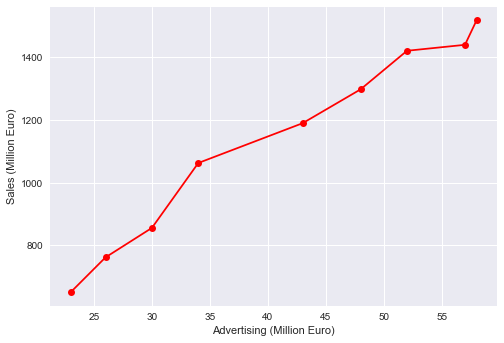

In [324]:
plt.plot(df['Ads'], df['Sales'], 'ro-')
plt.xlabel('Advertising (Million Euro)')
plt.ylabel('Sales (Million Euro)')
plt.grid(True)

In [325]:
model = linear_model.LinearRegression()
model.fit(df[['Ads']], df['Sales'])

# gradient / slope
print(model.coef_[0])
# intercept
print(model.intercept_)

23.422785592827324
167.6829494512292


In [326]:
# prediksi semua Ads di dataset
print(model.predict(df[['Ads']]))

[ 706.40701809  776.67537486  870.36651724  964.05765961 1174.86272994
 1291.97665791 1385.66780028 1502.78172824 1526.20451384]


In [327]:
salesPrediksiLR = model.predict(df[['Ads']])
df['salesPrediksi'] = salesPrediksiLR
df

,Sales,Ads,salesPrediksi
0,651,23,706.407018
1,762,26,776.675375
2,856,30,870.366517
3,1063,34,964.057660
4,1190,43,1174.862730
5,1298,48,1291.976658
6,1421,52,1385.667800
7,1440,57,1502.781728
8,1518,58,1526.204514


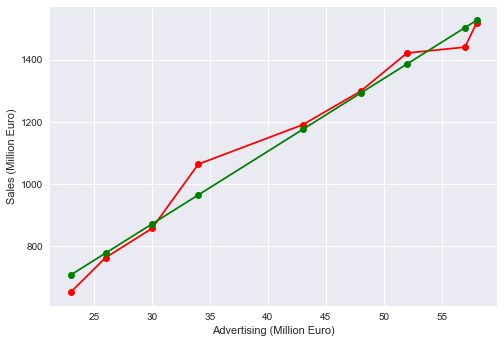

In [328]:
plt.plot(df['Ads'], df['Sales'], 'ro-')
plt.plot(df['Ads'], df['salesPrediksi'], 'go-')
plt.xlabel('Advertising (Million Euro)')
plt.ylabel('Sales (Million Euro)')
plt.grid(True)

In [329]:
# prediksi Ads 100 Million Euro, kira2 berapa Salesnya ?
print(model.predict([[100]])[0])

2509.9615087339616


In [330]:
# Sales 2000 Million Euro, kira2 berapa Adsnya ?
adv = (2000 - model.intercept_) / model.coef_[0]
adv

78.22797349559801

# Soal 2: https://github.com/LintangWisesa/Ujian_MachineLearning_JCDS03

In [331]:
df = pd.read_excel('indo_12_1.xls', header=3, index_col='Unnamed: 0', skipfooter= 2, na_values= '-')
df = df.transpose()
df = df.reset_index()
df

,index,Aceh,Sumatera Utara,Sumatera Barat,Riau,Jambi,Sumatera Selatan,Bengkulu,Lampung,Kepulauan Bangka Belitung,...,Sulawesi Tengah,Sulawesi Selatan,Sulawesi Tenggara,Gorontalo,Sulawesi Barat,Maluku,Maluku Utara,Papua Barat,Papua,INDONESIA
0,1971,2008595.0,6621831.0,2793196.0,1641545.0,1006084.0,3440573.0,519316.0,2777008.0,NaN,...,913662.0,5180576.0,714120.0,NaN,NaN,1089565.0,NaN,NaN,923440.0,119208229.0
1,1980,2611271.0,8360894.0,3406816.0,2168535.0,1445994.0,4629801.0,768064.0,4624785.0,NaN,...,1289635.0,6062212.0,942302.0,NaN,NaN,1411006.0,NaN,NaN,1173875.0,147490298.0
2,1990,3416156.0,10256027.0,4000207.0,3303976.0,2020568.0,6313074.0,1179122.0,6017573.0,NaN,...,1711327.0,6981646.0,1349619.0,NaN,NaN,1857790.0,NaN,NaN,1648708.0,179378946.0
3,1995,3847583.0,11114667.0,4323170.0,3900534.0,2369959.0,7207545.0,1409117.0,6657759.0,NaN,...,1938071.0,7558368.0,1586917.0,NaN,NaN,2086516.0,NaN,NaN,1942627.0,194754808.0
4,2000,3930905.0,11649655.0,4248931.0,4957627.0,2413846.0,6899675.0,1567432.0,6741439.0,900197.0,...,2218435.0,8059627.0,1821284.0,835044.0,NaN,1205539.0,785059.0,NaN,2220934.0,206264595.0
5,2010,4494410.0,12982204.0,4846909.0,5538367.0,3092265.0,7450394.0,1715518.0,7608405.0,1223296.0,...,2635009.0,8034776.0,2232586.0,1040164.0,1158651.0,1533506.0,1038087.0,760422.0,2833381.0,237641326.0


In [332]:
max2010 = df.loc[5][:-1].idxmax()
min1971 = df.loc[0][1:-1].idxmin()
indo = df.columns[-1:][0]
min1971

'Bengkulu'

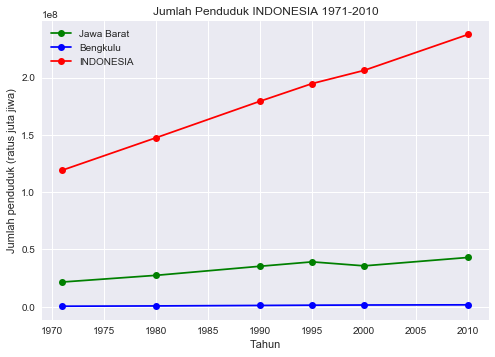

In [333]:
plt.style.use('seaborn')
plt.plot(df['index'], df[max2010], 'go-', label=max2010)
plt.plot(df['index'], df[min1971], 'bo-', label=min1971)
plt.plot(df['index'], df[indo], 'ro-', label=indo)
plt.legend()
plt.title('Jumlah Penduduk INDONESIA 1971-2010')
plt.xlabel('Tahun')
plt.ylabel('Jumlah penduduk (ratus juta jiwa)')
plt.show()

In [334]:
df[min1971]

0     519316.0
1     768064.0
2    1179122.0
3    1409117.0
4    1567432.0
5    1715518.0
Name: Bengkulu, dtype: float64

In [335]:
modelJabar = linear_model.LinearRegression()
modelJabar.fit(df[['index']], df[max2010])
mJabar = modelJabar.coef_[0]
cJabar = modelJabar.intercept_

modelBengk = linear_model.LinearRegression()
modelBengk.fit(df[['index']], df[min1971])
mBengk = modelBengk.coef_[0]
cBengk = modelBengk.intercept_

modelIndo = linear_model.LinearRegression()
modelIndo.fit(df[['index']], df[indo])
mIndo = modelIndo.coef_[0]
cIndo = modelIndo.intercept_

In [336]:
df['predJabar'] = modelJabar.predict(df[['index']])
df['predBengk'] = modelBengk.predict(df[['index']])
df['predIndo'] = modelIndo.predict(df[['index']])
df

,index,Aceh,Sumatera Utara,Sumatera Barat,Riau,Jambi,Sumatera Selatan,Bengkulu,Lampung,Kepulauan Bangka Belitung,...,Gorontalo,Sulawesi Barat,Maluku,Maluku Utara,Papua Barat,Papua,INDONESIA,predJabar,predBengk,predIndo
0,1971,2008595.0,6621831.0,2793196.0,1641545.0,1006084.0,3440573.0,519316.0,2777008.0,NaN,...,NaN,NaN,1089565.0,NaN,NaN,923440.0,119208229.0,2.299558e+07,5.334203e+05,1.202867e+08
1,1980,2611271.0,8360894.0,3406816.0,2168535.0,1445994.0,4629801.0,768064.0,4624785.0,NaN,...,NaN,NaN,1411006.0,NaN,NaN,1173875.0,147490298.0,2.783143e+07,8.302738e+05,1.475130e+08
2,1990,3416156.0,10256027.0,4000207.0,3303976.0,2020568.0,6313074.0,1179122.0,6017573.0,NaN,...,NaN,NaN,1857790.0,NaN,NaN,1648708.0,179378946.0,3.320459e+07,1.160111e+06,1.777645e+08
3,1995,3847583.0,11114667.0,4323170.0,3900534.0,2369959.0,7207545.0,1409117.0,6657759.0,NaN,...,NaN,NaN,2086516.0,NaN,NaN,1942627.0,194754808.0,3.589118e+07,1.325030e+06,1.928903e+08
4,2000,3930905.0,11649655.0,4248931.0,4957627.0,2413846.0,6899675.0,1567432.0,6741439.0,900197.0,...,835044.0,NaN,1205539.0,785059.0,NaN,2220934.0,206264595.0,3.857776e+07,1.489948e+06,2.080161e+08
5,2010,4494410.0,12982204.0,4846909.0,5538367.0,3092265.0,7450394.0,1715518.0,7608405.0,1223296.0,...,1040164.0,1158651.0,1533506.0,1038087.0,760422.0,2833381.0,237641326.0,4.395092e+07,1.819786e+06,2.382676e+08


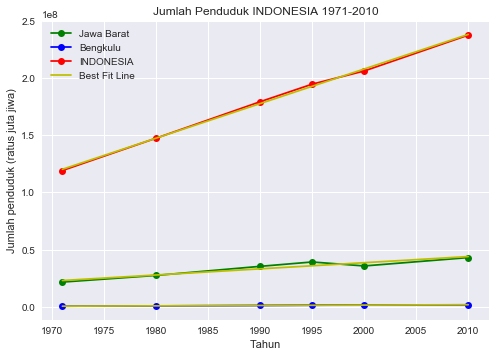

In [337]:
plt.style.use('seaborn')
plt.plot(df['index'], df[max2010], 'go-', label=max2010)
plt.plot(df['index'], df['predJabar'], 'y-')
plt.plot(df['index'], df[min1971], 'bo-', label=min1971)
plt.plot(df['index'], df['predBengk'], 'y-')
plt.plot(df['index'], df[indo], 'ro-', label=indo)
plt.plot(df['index'], df['predIndo'], 'y-', label='Best Fit Line')
plt.legend()
plt.title('Jumlah Penduduk INDONESIA 1971-2010')
plt.xlabel('Tahun')
plt.ylabel('Jumlah penduduk (ratus juta jiwa)')
plt.show()

In [338]:
print(f'Prediksi jumlah penduduk {max2010} di tahun 2050: {int(modelJabar.predict([[2050]])[0])}')
print(f'Prediksi jumlah penduduk {min1971} di tahun 2050: {int(modelBengk.predict([[2050]])[0])}')
print(f'Prediksi jumlah penduduk {indo} di tahun 2050: {int(modelIndo.predict([[2050]])[0])}')

Prediksi jumlah penduduk Jawa Barat di tahun 2050: 65443584
Prediksi jumlah penduduk Bengkulu di tahun 2050: 3139134
Prediksi jumlah penduduk INDONESIA di tahun 2050: 359273669
